In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
data = pd.read_csv("cardio_train.csv", delimiter = ";")

In [12]:
data.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


<Axes: xlabel='cardio', ylabel='weight'>

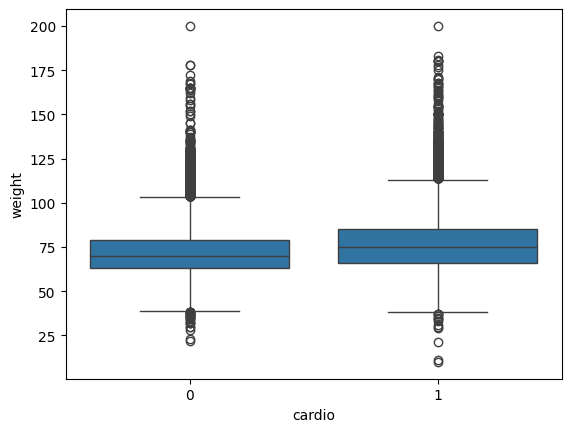

In [13]:
sns.boxplot(data = data, x = "cardio", y = "weight")

In [3]:
# Loading in the dataframes
heart_disease = pd.read_excel("heart_disease.xlsx")
intensive = pd.read_excel("cardiac_intensive.xlsx")
rehab = pd.read_excel("cardiac_rehab.xlsx")
cardio_physicians = pd.read_excel("cardio_disease.xlsx")
urban = pd.read_excel("urban_status.xlsx")

# Renaming the Value columns in the Dataframes
heart_disease = heart_disease.rename(columns={'Value': 'heart_disease_death_rate'})
intensive = intensive.rename(columns={'Value': 'intensive_care_units'})
rehab = rehab.rename(columns={'Value': 'rehabilitation_units'})
cardio_physicians = cardio_physicians.rename(columns={'Value': 'cardiac_physicians'})
urban = urban.rename(columns={'Value': 'urban_status'})

# Dropping the Category_Range column
heart_disease = heart_disease.drop(columns=['Category Range'])
intensive = intensive.drop(columns=['Category Range'])
rehab = rehab.drop(columns=['Category Range'])
cardio_physicians = cardio_physicians.drop(columns=['Category Range'])
urban = urban.drop(columns=['Category Range'])

heart_disease.head(5)

,County,State,heart_disease_death_rate
0,Summit,CO,38.3
1,Pitkin,CO,42.9
2,Eagle,CO,50.2
3,San Juan,WA,59.7
4,Valley,ID,63.6


In [4]:
# Creating the final dataframe for data collected from the Interactive Atlas

merge1 = pd.merge(heart_disease, intensive, how='outer', on=['County', 'State'])
merge2 = pd.merge(merge1, rehab, how='outer', on=['County', 'State'])
merge3 = pd.merge(merge2, cardio_physicians, how='outer', on=['County', 'State'])
final_df = pd.merge(merge3, urban, how='outer', on=['County', 'State'])

In [5]:
# Adding NAs
final_df.replace("Insufficient Data", np.nan, inplace=True)
final_df

,County,State,heart_disease_death_rate,intensive_care_units,rehabilitation_units,cardiac_physicians,urban_status
0,Abbeville,SC,176,0.0,0.0,NaN,0.0
1,Acadia,LA,254.9,0.0,0.0,NaN,0.0
2,Accomack,VA,217.1,0.0,0.0,NaN,0.0
3,Ada,ID,137.4,2.0,2.0,21.9,2.0
4,Adair,IA,184.2,1.0,1.0,NaN,1.0
...,...,...,...,...,...,...,...
3222,Yuma,AZ,130.7,1.0,1.0,16.4,1.0
3223,Yuma,CO,113.6,1.0,1.0,NaN,1.0
3224,Zapata,TX,127.7,0.0,0.0,NaN,0.0
3225,Zavala,TX,239.5,0.0,0.0,NaN,0.0


<Axes: xlabel='intensive_care_units', ylabel='heart_disease_death_rate'>

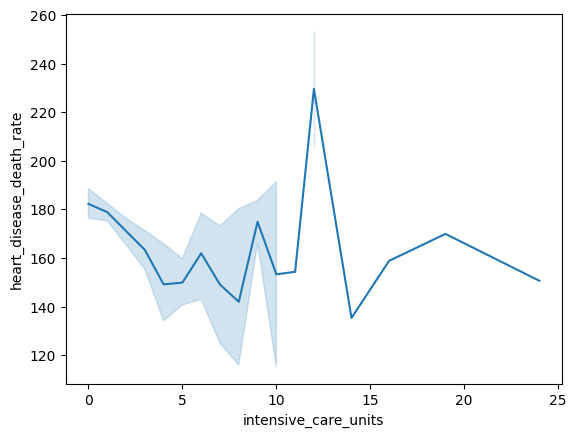

In [12]:
sns.lineplot(final_df.dropna(), x='intensive_care_units', y='heart_disease_death_rate')

In [ ]:
sns.boxplot(final_df.dropna(), x='urban_status', y='')